In [2]:
pip install numpy --upgrade

     |████████████████████████████████| 19.8 MB 3.9 MB/s eta 0:00:01     |█████████████████████▍          | 13.3 MB 4.2 MB/s eta 0:00:02
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.5
    Uninstalling numpy-1.16.5:
      Successfully uninstalled numpy-1.16.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb

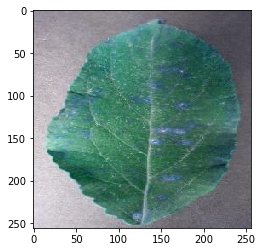

In [4]:
img = cv2.imread('./image.jpg')
plt.imshow(img)
plt.show()

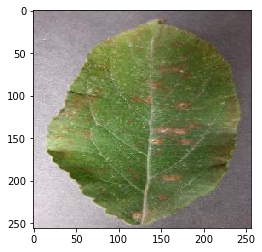

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

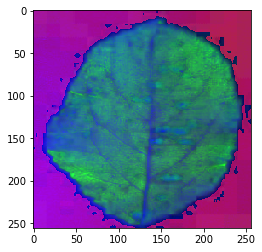

In [6]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

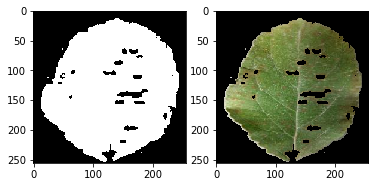

In [7]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

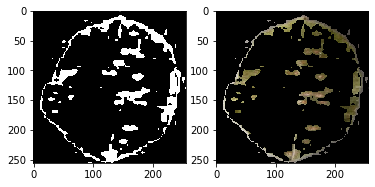

In [8]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()

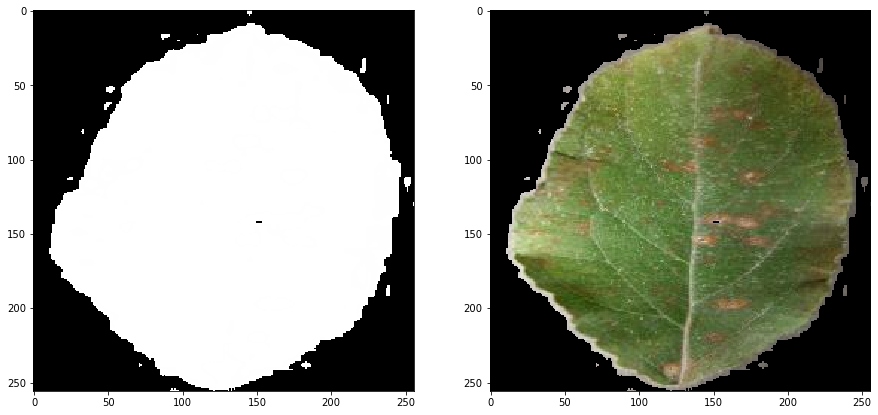

In [9]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [10]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Feature Descripotor

surf = cv2.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(final_result,None)
len(kp)

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [20]:
print(kp)

[<KeyPoint 0000023ACCCE3E40>, <KeyPoint 0000023ACCCE3EA0>, <KeyPoint 0000023ACD8B9930>, <KeyPoint 0000023ACD8B99C0>, <KeyPoint 0000023ACD8B9B40>, <KeyPoint 0000023ACD8B9BD0>, <KeyPoint 0000023ACD8B9EA0>, <KeyPoint 0000023ACD8B99F0>, <KeyPoint 0000023ACD8B9ED0>, <KeyPoint 0000023ACD8B9F00>, <KeyPoint 0000023ACD8B9DB0>, <KeyPoint 0000023ACD8B9CC0>, <KeyPoint 0000023ACD8B9D80>, <KeyPoint 0000023ACD8B9D50>, <KeyPoint 0000023ACD8B9F90>, <KeyPoint 0000023ACD8B9FC0>, <KeyPoint 0000023ACD8B9F60>, <KeyPoint 0000023ACD6C8030>, <KeyPoint 0000023ACD6C8060>, <KeyPoint 0000023ACD6C8090>, <KeyPoint 0000023ACD6C80C0>, <KeyPoint 0000023ACD6C80F0>, <KeyPoint 0000023ACD6C8120>, <KeyPoint 0000023ACD6C8150>, <KeyPoint 0000023ACD6C8180>, <KeyPoint 0000023ACD6C81B0>, <KeyPoint 0000023ACD6C81E0>, <KeyPoint 0000023ACD6C8210>, <KeyPoint 0000023ACD6C8240>, <KeyPoint 0000023ACD6C8270>, <KeyPoint 0000023ACD6C82A0>, <KeyPoint 0000023ACD6C82D0>, <KeyPoint 0000023ACD6C8300>, <KeyPoint 0000023ACD6C8330>, <KeyPoint 000

In [21]:
print(des)

[[ 0.          0.          0.         ... -0.00021652  0.00097847
   0.00114048]
 [ 0.          0.          0.         ...  0.00016049  0.00091302
   0.00066208]
 [ 0.00701571 -0.00964417  0.00778186 ...  0.00178146  0.00166531
   0.00231891]
 ...
 [-0.00191567  0.00205072  0.00200102 ...  0.00166039  0.00220279
   0.00291323]
 [-0.00528289  0.01501577  0.01313482 ... -0.00098651  0.00467307
   0.00252157]
 [-0.00095609 -0.00620609  0.02660246 ... -0.00146699  0.00247034
   0.00225198]]


In [22]:
img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)

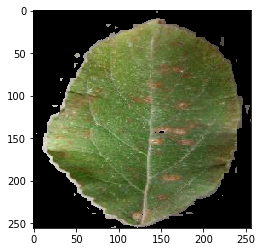

In [23]:
plt.imshow(final_result)


In [24]:
# global Feature
global_feature = des

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [26]:
global_feature.shape

(217, 64)

In [27]:
surf.descriptorSize()

64

In [28]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (217, 64)


In [30]:
a = global_feature
np.savetxt("doo.csv", a, delimiter=",")